<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/optimization_with_constraints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Equality constraint (1)

$ f(x) = f(x_1) + f(x_2) \quad s.t \quad f(x_1) = (x-2)^2,\ f(x_2) = (x-5)^2 $

$ Constraints => x_1 + x_2 = 10 $

$ Objective = \min_{r \in R^n} f(x) $

Convert the problem into dual problem



iter 0 λ: -0.3000, x1: 2.0000, x2: 5.0000, constraint: 7.0000
iter 10 λ: -2.0586, x1: 2.9770, x2: 5.9770, constraint: 8.9540
iter 20 λ: -2.6717, x1: 3.3176, x2: 6.3176, constraint: 9.6353
iter 30 λ: -2.8855, x1: 3.4364, x2: 6.4364, constraint: 9.8728
iter 40 λ: -2.9601, x1: 3.4778, x2: 6.4778, constraint: 9.9557
iter 50 λ: -2.9861, x1: 3.4923, x2: 6.4923, constraint: 9.9845
iter 60 λ: -2.9951, x1: 3.4973, x2: 6.4973, constraint: 9.9946
iter 70 λ: -2.9983, x1: 3.4991, x2: 6.4991, constraint: 9.9981
iter 80 λ: -2.9994, x1: 3.4997, x2: 6.4997, constraint: 9.9993
iter 90 λ: -2.9998, x1: 3.4999, x2: 6.4999, constraint: 9.9998


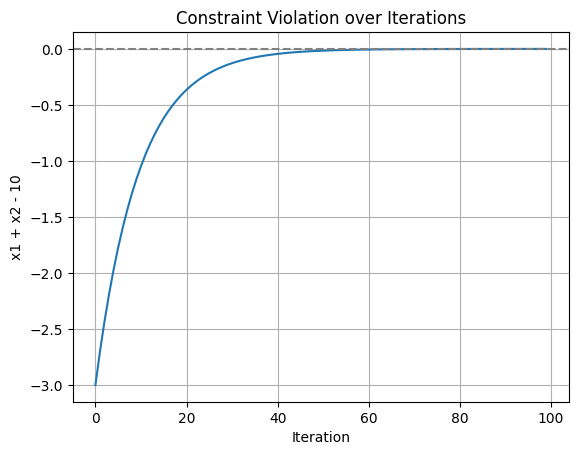

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Agent 1: minimizes (x1 - 2)^2 + lambda * x1
def agent1(lambda_):
    return -lambda_/2 + 2

# Agent 2: minimizes (x2 - 5)^2 + lambda * x2
def agent2(lambda_):
    return -lambda_/2 + 5

# Dual variable update (gradient ascent)
def dual_decomposition(num_iters=100, alpha=0.1):
    lambda_vals = []
    constraint_vals = []
    lambda_ = 0  # initial dual variable
    for iteration in range(num_iters):
        x1 = agent1(lambda_)
        x2 = agent2(lambda_)
        constraint_violation = x1 + x2 - 10
        lambda_ = lambda_ + alpha * constraint_violation
        lambda_vals.append(lambda_)
        constraint_vals.append(constraint_violation)
        if iteration % 10 == 0:
          print(f"iter {iteration} λ: {lambda_:.4f}, x1: {x1:.4f}, x2: {x2:.4f}, constraint: {x1 + x2:.4f}")
    return lambda_vals, constraint_vals

# Run and plot
lambda_vals, constraint_vals = dual_decomposition()

plt.plot(constraint_vals)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Constraint Violation over Iterations")
plt.xlabel("Iteration")
plt.ylabel("x1 + x2 - 10")
plt.grid(True)
plt.show()


Iter  0 | λ: 0.0000, μ: 0.3000 | x1: 2.0000, x2: 5.0000 | c1: -3.0000, c2: 3.0000
Iter 50 | λ: 0.0000, μ: 5.5614 | x1: 4.7692, x2: 5.0000 | c1: -0.2308, c2: 0.2308
Iter 100 | λ: 0.0000, μ: 5.9663 | x1: 4.9822, x2: 5.0000 | c1: -0.0178, c2: 0.0178
Iter 150 | λ: 0.0000, μ: 5.9974 | x1: 4.9986, x2: 5.0000 | c1: -0.0014, c2: 0.0014
Iter 200 | λ: 0.0000, μ: 5.9998 | x1: 4.9999, x2: 5.0000 | c1: -0.0001, c2: 0.0001
Iter 250 | λ: 0.0000, μ: 6.0000 | x1: 5.0000, x2: 5.0000 | c1: -0.0000, c2: 0.0000


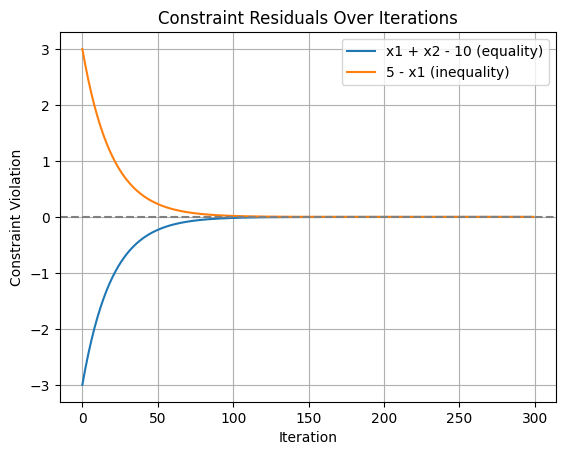

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Closed-form solutions for x1 and x2 using gradients
def x1_fn(lam, mu):
    return (4 + lam + mu) / 2  # derived from ∇x1 g = 0

def x2_fn(lam):
    return (10 + lam) / 2      # derived from ∇x2 g = 0

def dual_decomposition(num_iters=300, alpha=0.1):
    lam = 0.0  # λ ≥ 0
    mu = 0.0   # μ ≥ 0
    constraint_vals = []

    for i in range(num_iters):
        x1 = x1_fn(lam, mu)
        x2 = x2_fn(lam)

        # Constraint residuals
        c1 = x1 + x2 - 10       # x1 + x2 = 10
        c2 = 5 - x1             # x1 >= 5  →  5 - x1 <= 0

        # Projected gradient ascent
        lam += alpha * c1
        mu += alpha * c2

        # Project to non-negative orthant
        lam = max(0, lam)
        mu = max(0, mu)

        constraint_vals.append((c1, c2))
        if i % 50 == 0:
            print(f"Iter {i:2d} | λ: {lam:.4f}, μ: {mu:.4f} | x1: {x1:.4f}, x2: {x2:.4f} | c1: {c1:.4f}, c2: {c2:.4f}")

    return np.array(constraint_vals)

# Run and plot
constraint_vals = dual_decomposition()

plt.plot(constraint_vals[:, 0], label="x1 + x2 - 10 (equality)")
plt.plot(constraint_vals[:, 1], label="5 - x1 (inequality)")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("Constraint Violation")
plt.title("Constraint Residuals Over Iterations")
plt.legend()
plt.grid(True)
plt.show()


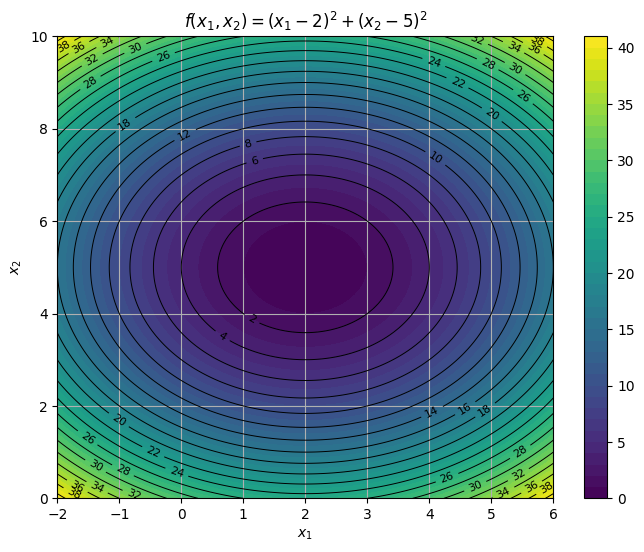

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create meshgrid for x1 and x2
x1 = np.linspace(-2, 6, 300)
x2 = np.linspace(0, 10, 300)
X1, X2 = np.meshgrid(x1, x2)

# Compute the combined function
Z = (X1 - 2)**2 + (X2 - 5)**2

# Plot contour lines
fig, ax = plt.subplots(figsize=(8, 6))
contours = ax.contour(X1, X2, Z, levels=20, colors='black', linewidths=0.7)
cp = ax.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
ax.clabel(contours, inline=True, fontsize=8)
ax.set_title(r'$f(x_1, x_2) = (x_1 - 2)^2 + (x_2 - 5)^2$')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.grid(True)
plt.show()


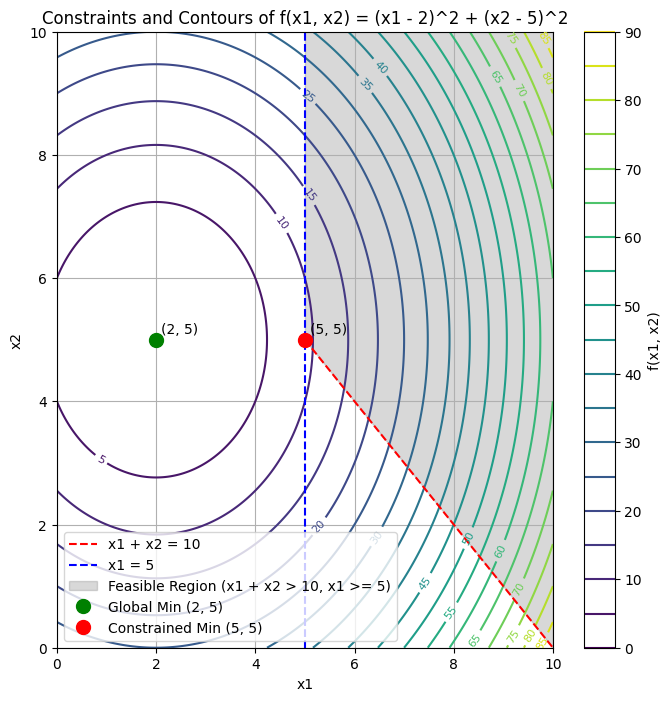

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x1, x2) = (x1 - 2)^2 + (x2 - 5)^2
def f(x1, x2):
    return (x1 - 2)**2 + (x2 - 5)**2

# Create a grid for plotting
x1 = np.linspace(0, 10, 400)
x2 = np.linspace(0, 10, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Create the plot
plt.figure(figsize=(8, 8))

# Plot contours of the function
contour = plt.contour(X1, X2, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.colorbar(contour, label='f(x1, x2)')

# Plot the constraint x1 + x2 > 10 (boundary x2 = 10 - x1)
x1_line = np.linspace(5, 10, 100)
x2_line = 10 - x1_line
plt.plot(x1_line, x2_line, 'r--', label='x1 + x2 = 10')

# Shade the feasible region (x1 >= 5, x2 > 10 - x1)
# For x1 >= 5
plt.axvline(x=5, color='b', linestyle='--', label='x1 = 5')
# Shade x1 >= 5 and x2 >= 10 - x1
plt.fill_between(x1_line, x2_line, 10, color='gray', alpha=0.3, label='Feasible Region (x1 + x2 > 10, x1 >= 5)')

# Mark the global minimum at (2, 5)
plt.plot(2, 5, 'go', markersize=10, label='Global Min (2, 5)')
plt.text(2.1, 5.1, '(2, 5)', fontsize=10)

# Mark the constrained minimum at (5, 5)
plt.plot(5, 5, 'ro', markersize=10, label='Constrained Min (5, 5)')
plt.text(5.1, 5.1, '(5, 5)', fontsize=10)

# Add labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Constraints and Contours of f(x1, x2) = (x1 - 2)^2 + (x2 - 5)^2')
plt.legend()
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)

# Show the plot
plt.show()

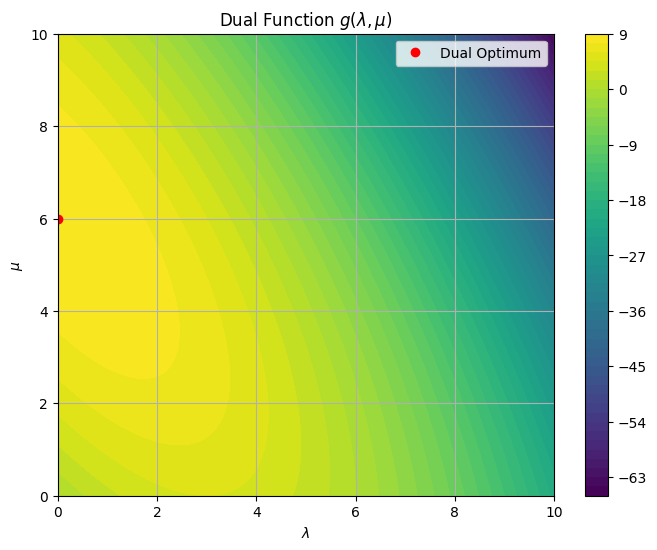

Optimal λ = 0.0000, Optimal μ = 6.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the dual function g(lambda, mu)
def dual_obj(lam_mu):
    lam, mu = lam_mu
    return -(-0.5 * lam**2 - 0.5 * lam * mu - 0.25 * mu**2 + 3 * lam + 3 * mu)  # Minimize negative

# Set up a grid for plotting
lam_vals = np.linspace(0, 10, 100)
mu_vals = np.linspace(0, 10, 100)
LAM, MU = np.meshgrid(lam_vals, mu_vals)
G = -0.5 * LAM**2 - 0.5 * LAM * MU - 0.25 * MU**2 + 3 * LAM + 3 * MU

# Plot contour
plt.figure(figsize=(8, 6))
cp = plt.contourf(LAM, MU, G, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\mu$')
plt.title('Dual Function $g(\\lambda, \\mu)$')

# Solve the dual problem
res = minimize(dual_obj, x0=[1, 1], bounds=[(0, None), (0, None)])
opt_lambda, opt_mu = res.x

# Mark the optimal point
plt.plot(opt_lambda, opt_mu, 'ro', label='Dual Optimum')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal λ = {opt_lambda:.4f}, Optimal μ = {opt_mu:.4f}")


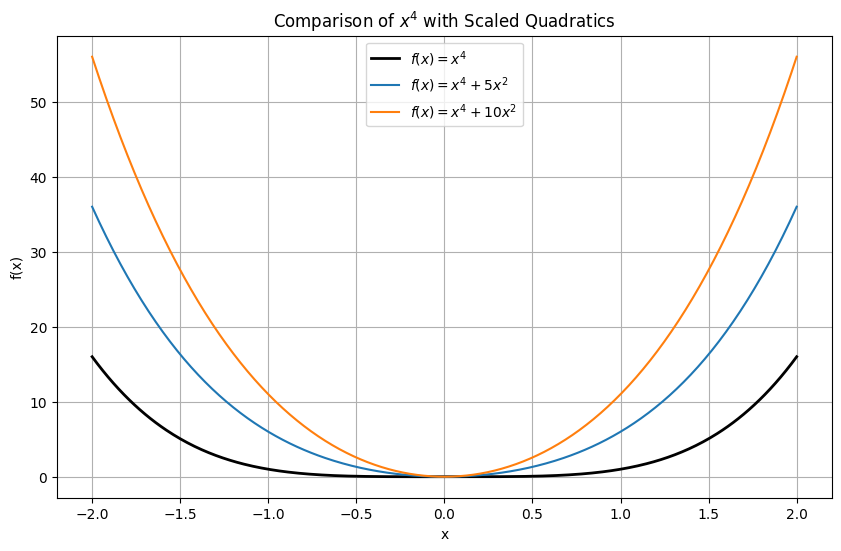

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define domain
x = np.linspace(-2, 2, 400)

# x^4 function
f_x4 = x**4

# Plot setup
plt.figure(figsize=(10, 6))

# Plot x^4
plt.plot(x, f_x4, label=r'$f(x) = x^4$', color='black', linewidth=2)

# Plot scaled quadratic functions
for coeff in [5, 10]:
    fx = coeff * x**2 + f_x4
    plt.plot(x, fx, label=rf'$f(x) = x^4 + {coeff}x^2$')

plt.title("Comparison of $x^4$ with Scaled Quadratics")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


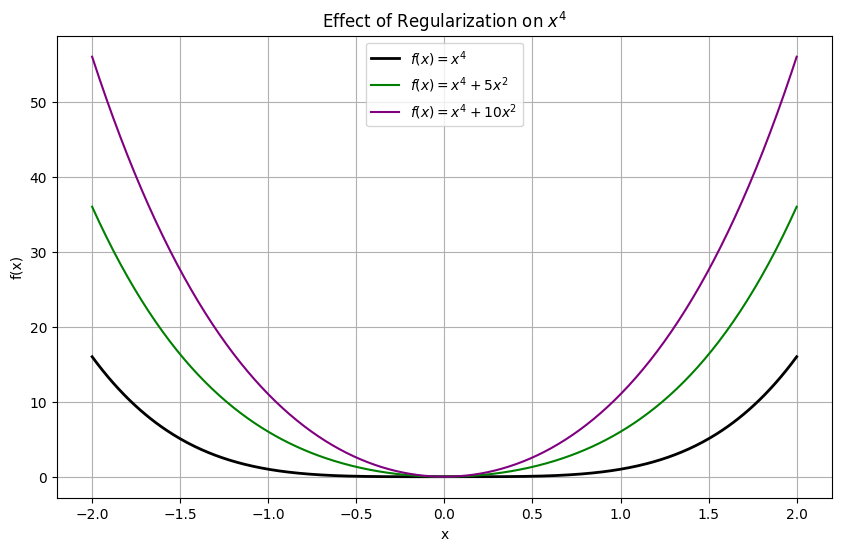

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define domain
x = np.linspace(-2, 2, 400)

# Define functions
f_x4 = x**4
f_x4_5x2 = x**4 + 5 * x**2
f_x4_10x2 = x**4 + 10 * x**2

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, f_x4, label=r'$f(x) = x^4$', color='black', linewidth=2)
plt.plot(x, f_x4_5x2, label=r'$f(x) = x^4 + 5x^2$', color='green')
plt.plot(x, f_x4_10x2, label=r'$f(x) = x^4 + 10x^2$', color='purple')

plt.title("Effect of Regularization on $x^4$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


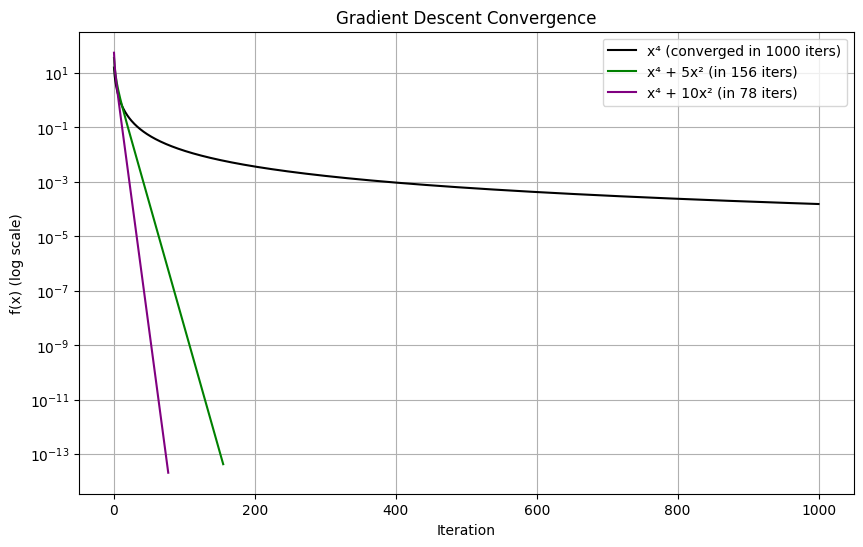

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Functions and gradients
def f1(x): return x**4
def df1(x): return 4 * x**3

def f2(x): return x**4 + 5 * x**2
def df2(x): return 4 * x**3 + 10 * x

def f3(x): return x**4 + 10 * x**2
def df3(x): return 4 * x**3 + 20 * x

# Gradient descent function
def gradient_descent(f, df, x0, lr, tol=1e-6, max_iter=1000):
    x = x0
    history = [f(x)]
    for i in range(max_iter):
        grad = df(x)
        if abs(grad) < tol:
            break
        x = x - lr * grad
        history.append(f(x))
    return history, i + 1

# Setup
x0 = 2.0
lr = 0.01

# Run for each function
hist1, iters1 = gradient_descent(f1, df1, x0, lr)
hist2, iters2 = gradient_descent(f2, df2, x0, lr)
hist3, iters3 = gradient_descent(f3, df3, x0, lr)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(hist1, label=f'x⁴ (converged in {iters1} iters)', color='black')
plt.plot(hist2, label=f'x⁴ + 5x² (in {iters2} iters)', color='green')
plt.plot(hist3, label=f'x⁴ + 10x² (in {iters3} iters)', color='purple')

plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("f(x) (log scale)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.legend()
plt.show()


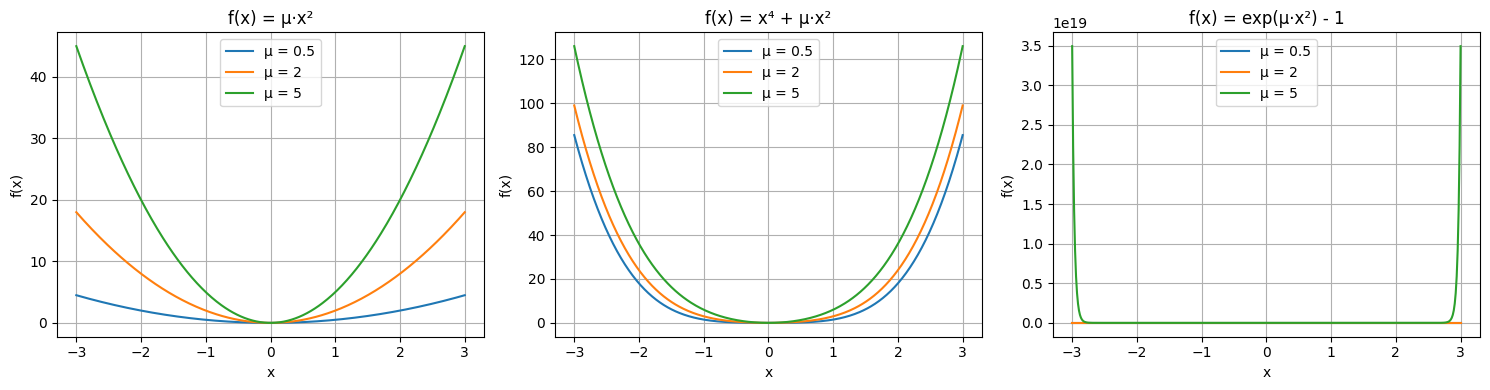

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define 1D convex functions using mu as the curvature control
def f_quad(x, mu):
    return mu * x**2

def f_quartic_reg(x, mu):
    return x**4 + mu * x**2  # Strongly convex when mu > 0

def f_exp_bowl(x, mu):
    return np.exp(mu * x**2) - 1  # Convex and sharper with higher mu

# x range
x = np.linspace(-3, 3, 400)
mu_values = [0.5, 2, 5]

# Plot each function for different mu values
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, func, title in zip(
    axes,
    [f_quad, f_quartic_reg, f_exp_bowl],
    ["f(x) = μ·x²", "f(x) = x⁴ + μ·x²", "f(x) = exp(μ·x²) - 1"]
):
    for mu in mu_values:
        ax.plot(x, func(x, mu), label=f"μ = {mu}")
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


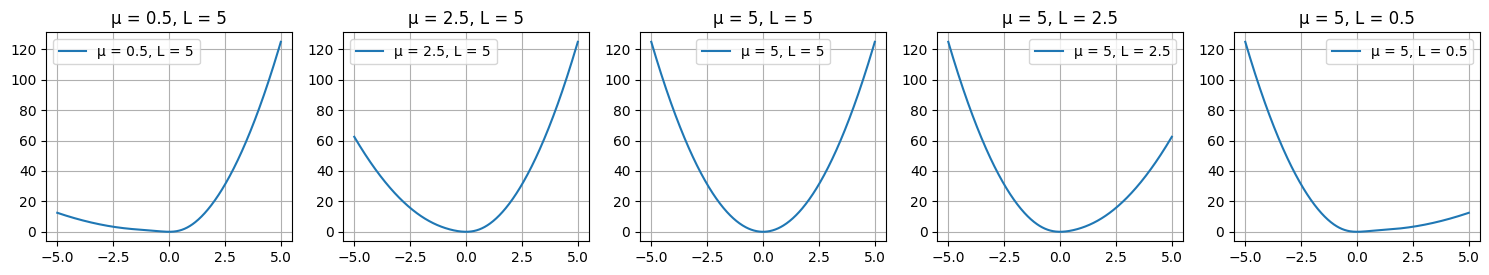

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax-curved quadratic: curvature transitions from mu to L
def softmax_quadratic(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    curvature = (w1 * mu + w2 * L) / (w1 + w2)
    return curvature * x**2

# μ and L pairs to explore
mu_L_pairs = [
    (0.5, 5), (2.5, 5), (5, 5),
    (5, 2.5), (5, 0.5) ]

# Plot setup
x = np.linspace(-5, 5, 500)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, (mu, L) in zip(axes.flat, mu_L_pairs):
    y = softmax_quadratic(x, mu, L, alpha=1.0)
    ax.plot(x, y, label=f"μ = {mu}, L = {L}")
    ax.set_title(f"μ = {mu}, L = {L}")
    ax.grid(True)
    ax.legend()

# plt.suptitle("Softmax-Based Parabolic Functions for Different μ-L Pairs", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


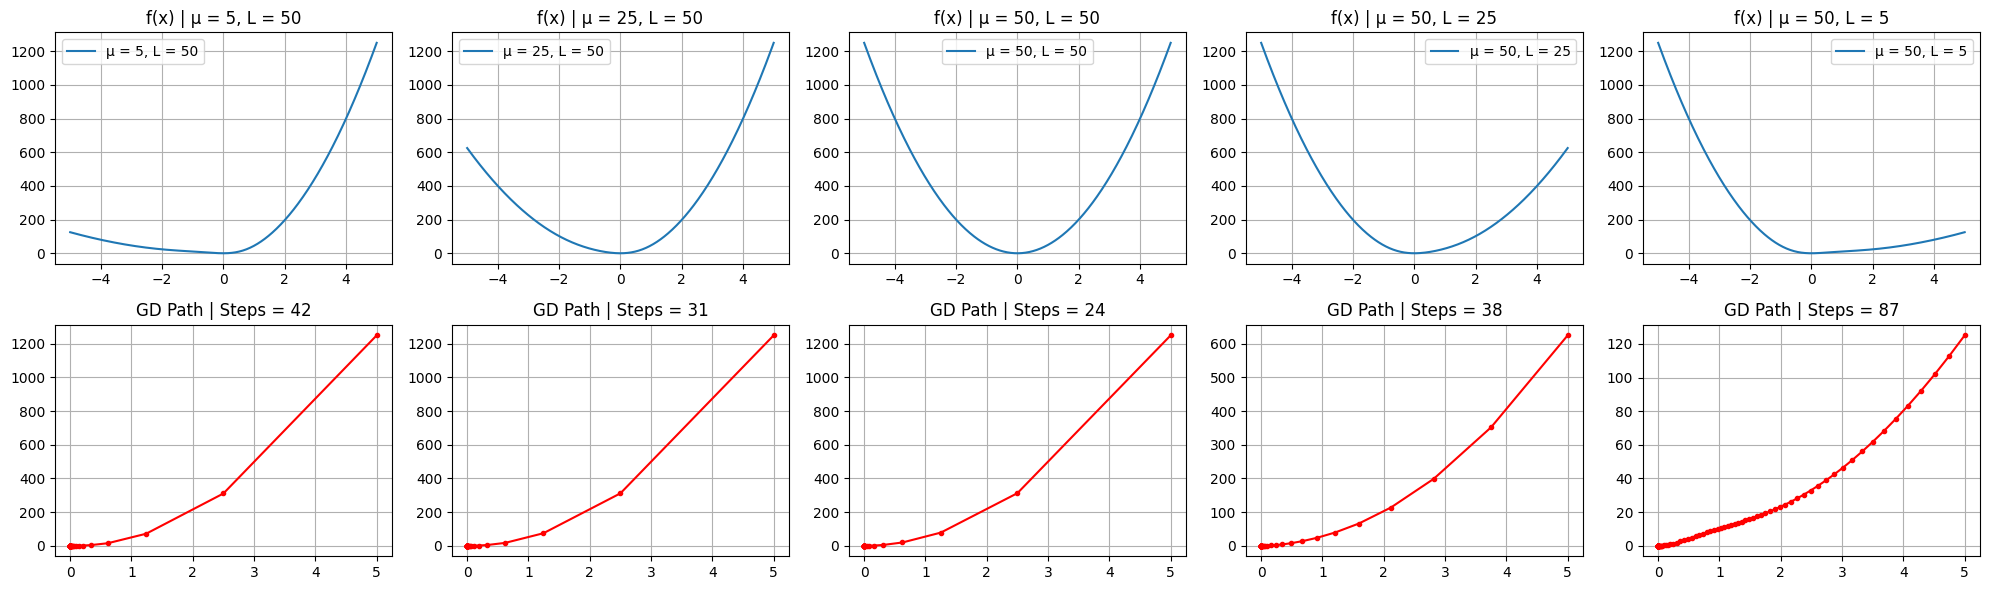

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax-based curvature function
def softmax_coeff(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    return (w1 * mu + w2 * L) / (w1 + w2)

def softmax_quadratic(x, mu, L, alpha=1.0):
    return softmax_coeff(x, mu, L, alpha) * x**2

def grad_softmax_quadratic(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    denom = (w1 + w2)**2
    coeff = (w1 * mu + w2 * L) / (w1 + w2)
    d_coeff_dx = alpha * (w1 * w2) * (L - mu) * 2 / denom
    return 2 * coeff * x + d_coeff_dx * x**2

# Gradient Descent
def gradient_descent(mu, L, alpha=1.0, lr=0.005, tol=1e-4, max_iter=1000):
    x = 5.0
    path = [x]
    for i in range(max_iter):
        grad = grad_softmax_quadratic(x, mu, L, alpha)
        x = x - lr * grad
        path.append(x)
        if abs(grad) < tol:
            break
    return np.array(path), i + 1

# μ and L pairs to explore
mu_L_pairs = [
    (5, 50), (25, 50), (50, 50),
    (50, 25), (50, 5)
]

x = np.linspace(-5, 5, 500)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Plot function curves
for ax, (mu, L) in zip(axes[0], mu_L_pairs):
    y = softmax_quadratic(x, mu, L)
    ax.plot(x, y, label=f"μ = {mu}, L = {L}")
    ax.set_title(f"f(x) | μ = {mu}, L = {L}")
    ax.grid(True)
    ax.legend()

# Plot GD paths
for ax, (mu, L) in zip(axes[1], mu_L_pairs):
    path, steps = gradient_descent(mu, L)
    y_path = softmax_quadratic(path, mu, L)
    ax.plot(path, y_path, 'ro-', markersize=3)
    ax.set_title(f"GD Path | Steps = {steps}")
    ax.grid(True)

plt.tight_layout()
plt.show()


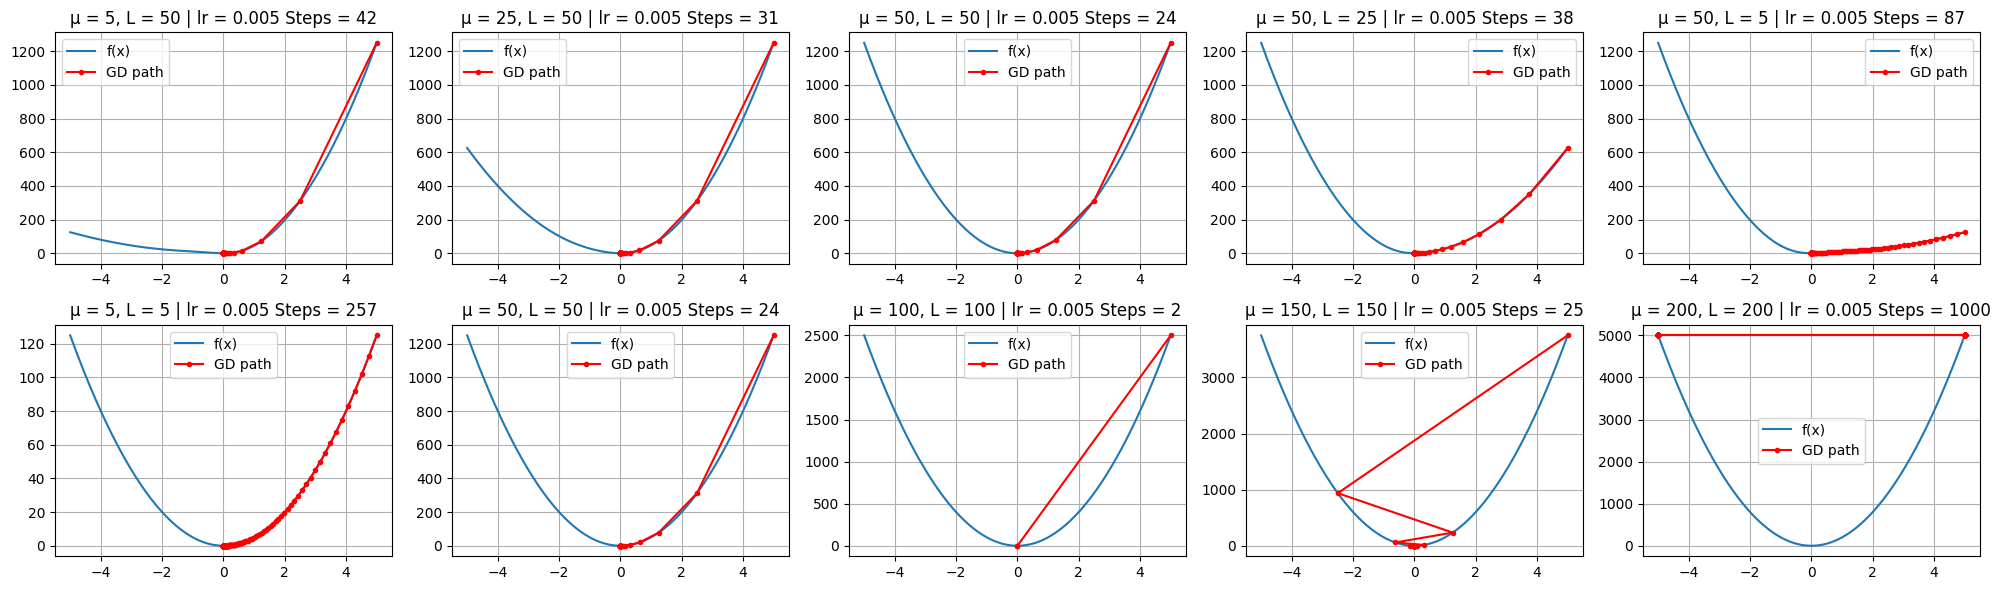

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax-based curvature function
def softmax_coeff(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    return (w1 * mu + w2 * L) / (w1 + w2)

def softmax_quadratic(x, mu, L, alpha=1.0):
    return softmax_coeff(x, mu, L, alpha) * x**2

def grad_softmax_quadratic(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    denom = (w1 + w2)**2
    coeff = (w1 * mu + w2 * L) / (w1 + w2)
    d_coeff_dx = alpha * (w1 * w2) * (L - mu) * 2 / denom
    return 2 * coeff * x + d_coeff_dx * x**2

# Gradient Descent
def gradient_descent(mu, L, alpha=1.0, lr=0.005, tol=1e-4, max_iter=1000):
    x = 5.0
    path = [x]
    for i in range(max_iter):
        grad = grad_softmax_quadratic(x, mu, L, alpha)
        x = x - lr * grad
        path.append(x)
        if abs(grad) < tol:
            break
    return np.array(path), i + 1

# μ and L pairs to explore
mu_L_pairs = [
    (5, 50), (25, 50), (50, 50), (50, 25), (50, 5),
    (5, 5), (50, 50), (100, 100), (150, 150), (200, 200)
]

x = np.linspace(-5, 5, 500)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Flatten axes for iteration
axes = axes.flat

# Plot function and GD path on same axes
for ax, (mu, L) in zip(axes, mu_L_pairs):
    y = softmax_quadratic(x, mu, L)
    path, steps = gradient_descent(mu, L)
    y_path = softmax_quadratic(path, mu, L)

    ax.plot(x, y, label="f(x)")
    ax.plot(path, y_path, 'ro-', markersize=3, label="GD path")
    ax.set_title(f"μ = {mu}, L = {L} | lr = {0.005} Steps = {steps}")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


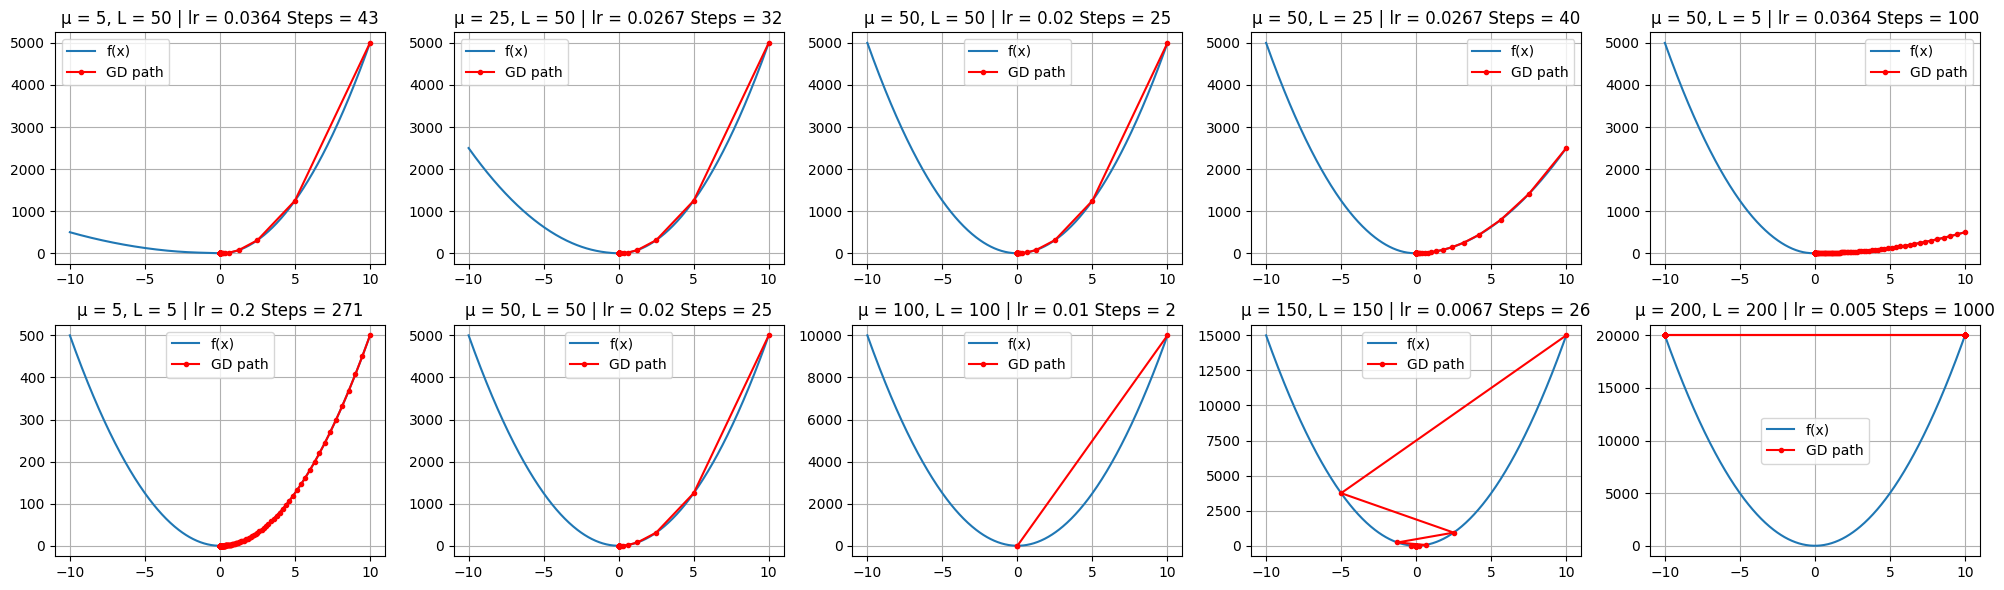

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax-based curvature function
def softmax_coeff(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    return (w1 * mu + w2 * L) / (w1 + w2)

def softmax_quadratic(x, mu, L, alpha=1.0):
    return softmax_coeff(x, mu, L, alpha) * x**2

def grad_softmax_quadratic(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    denom = (w1 + w2)**2
    coeff = (w1 * mu + w2 * L) / (w1 + w2)
    d_coeff_dx = alpha * (w1 * w2) * (L - mu) * 2 / denom
    return 2 * coeff * x + d_coeff_dx * x**2

# Gradient Descent
def gradient_descent(mu, L, alpha=1.0, lr=round(2/(mu+L),4), tol=1e-4, max_iter=1000):
    x = 10
    path = [x]
    for i in range(max_iter):
        grad = grad_softmax_quadratic(x, mu, L, alpha)
        x = x - lr * grad
        path.append(x)
        if abs(grad) < tol:
            break
    return np.array(path), i + 1

# μ and L pairs to explore
mu_L_pairs = [
    (5, 50), (25, 50), (50, 50), (50, 25), (50, 5),
    (5, 5), (50, 50), (100, 100), (150, 150), (200, 200)
]

x = np.linspace(-10, 10, 500)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Flatten axes for iteration
axes = axes.flat

# Plot function and GD path on same axes
for ax, (mu, L) in zip(axes, mu_L_pairs):
    y = softmax_quadratic(x, mu, L)
    path, steps = gradient_descent(mu, L)
    y_path = softmax_quadratic(path, mu, L)

    ax.plot(x, y, label="f(x)")
    ax.plot(path, y_path, 'ro-', markersize=3, label="GD path")
    ax.set_title(f"μ = {mu}, L = {L} | lr = {round(2/(mu+L),4)} Steps = {steps}")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


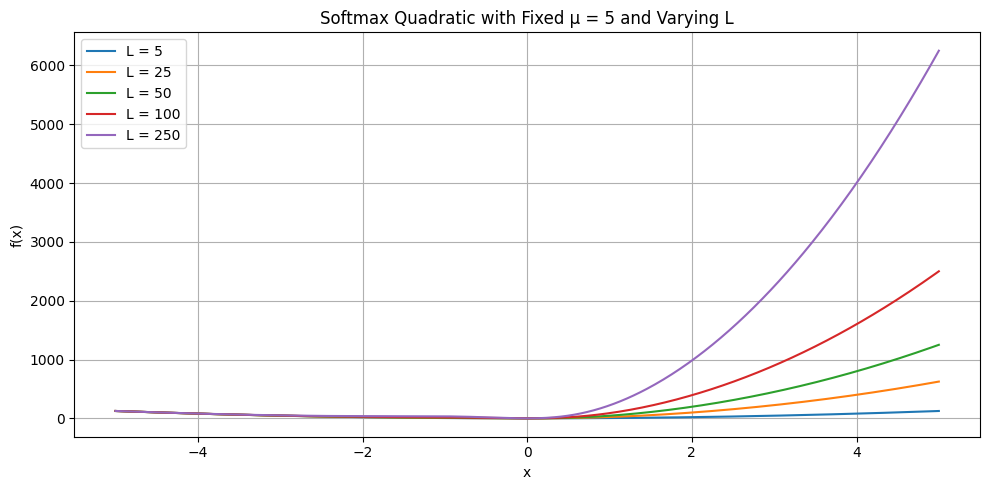

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax-weighted quadratic function
def softmax_coeff(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    return (w1 * mu + w2 * L) / (w1 + w2)

def softmax_quadratic(x, mu, L, alpha=1.0):
    return softmax_coeff(x, mu, L, alpha) * x**2

# Fixed mu, varying L
mu = 5
L_values = [5, 25, 50, 100, 250]
x = np.linspace(-5, 5, 500)

# Plot
plt.figure(figsize=(10, 5))
for L in L_values:
    y = softmax_quadratic(x, mu, L)
    plt.plot(x, y, label=f"L = {L}")

plt.title(f"Softmax Quadratic with Fixed μ = {mu} and Varying L")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


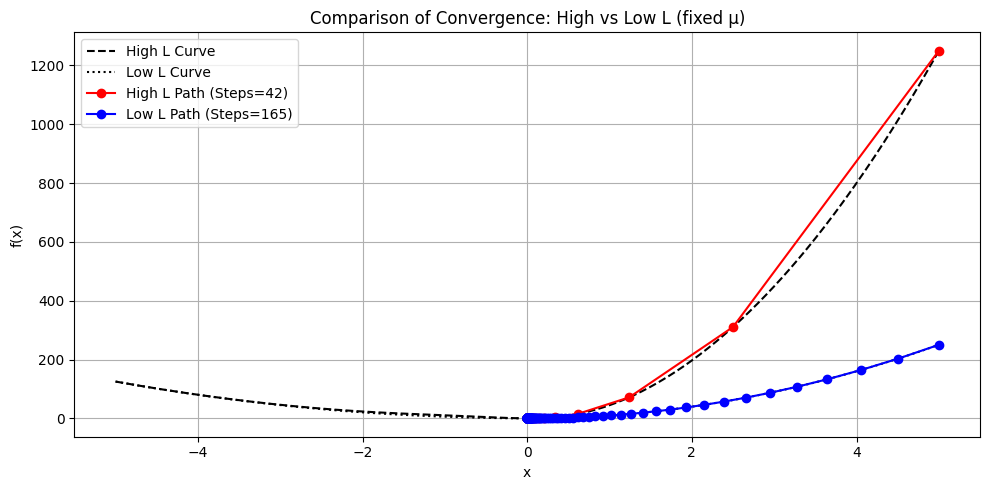

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax-weighted quadratic function
def softmax_coeff(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    return (w1 * mu + w2 * L) / (w1 + w2)

def softmax_quadratic(x, mu, L, alpha=1.0):
    return softmax_coeff(x, mu, L, alpha) * x**2

def grad_softmax_quadratic(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    denom = (w1 + w2)**2
    coeff = (w1 * mu + w2 * L) / (w1 + w2)
    d_coeff_dx = alpha * (w1 * w2) * (L - mu) * 2 / denom
    return 2 * coeff * x + d_coeff_dx * x**2

# Gradient Descent function
def gradient_descent(mu, L, x0=5.0, lr=0.005, tol=1e-4, max_iter=1000):
    x = x0
    path = [x]
    for i in range(max_iter):
        grad = grad_softmax_quadratic(x, mu, L)
        x = x - lr * grad
        path.append(x)
        if abs(grad) < tol:
            break
    return np.array(path), i + 1

# Setup
mu = 5
L_high = 50
L_low = 10
x = np.linspace(-5, 5, 500)

# Run both cases
path_highL, steps_highL = gradient_descent(mu, L_high)
path_lowL, steps_lowL = gradient_descent(mu, L_low)
y_highL = softmax_quadratic(path_highL, mu, L_high)
y_lowL = softmax_quadratic(path_lowL, mu, L_low)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, softmax_quadratic(x, mu, L_high), 'k--', label='High L Curve')
plt.plot(x, softmax_quadratic(x, mu, L_low), 'k:', label='Low L Curve')

plt.plot(path_highL, y_highL, 'ro-', label=f'High L Path (Steps={steps_highL})')
plt.plot(path_lowL, y_lowL, 'bo-', label=f'Low L Path (Steps={steps_lowL})')

plt.title("Comparison of Convergence: High vs Low L (fixed μ)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


-5
5


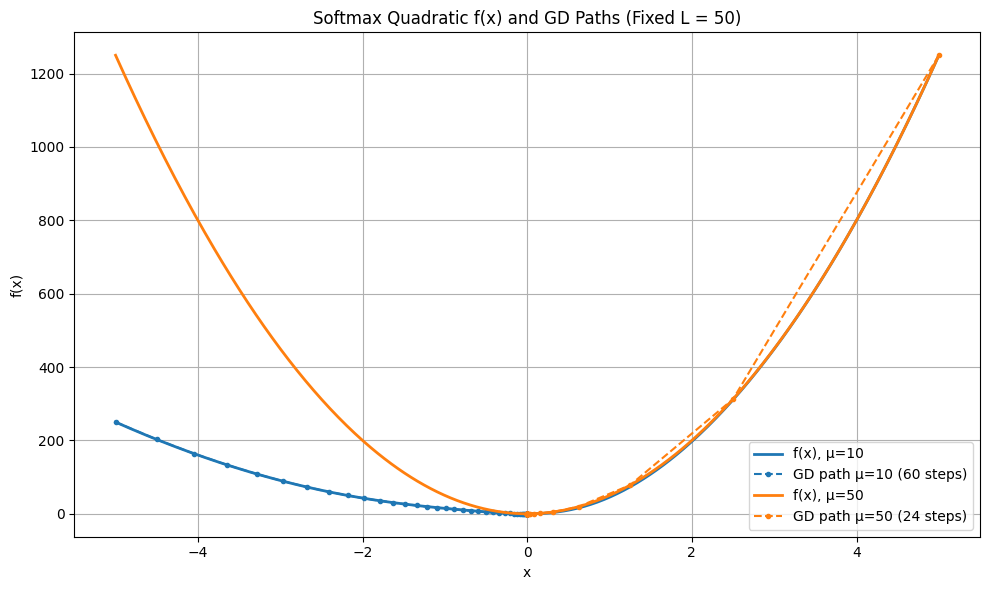

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax-based curvature function
def softmax_coeff(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    return (w1 * mu + w2 * L) / (w1 + w2)

def softmax_quadratic(x, mu, L, alpha=1.0):
    return softmax_coeff(x, mu, L, alpha) * x**2

def grad_softmax_quadratic(x, mu, L, alpha=1.0):
    w1 = np.exp(-alpha * x)
    w2 = np.exp(alpha * x)
    denom = (w1 + w2)**2
    coeff = (w1 * mu + w2 * L) / (w1 + w2)
    d_coeff_dx = alpha * (w1 * w2) * (L - mu) * 2 / denom
    return 2 * coeff * x + d_coeff_dx * x**2

# Gradient Descent
def gradient_descent(mu, L, alpha=1.0, x0=5.0, lr=0.005, tol=1e-4, max_iter=1000):
    x = x0
    print (x0)
    path = [x]
    for i in range(max_iter):
        grad = grad_softmax_quadratic(x, mu, L, alpha)
        x = x - lr * grad
        path.append(x)
        if abs(grad) < tol:
            break
    return np.array(path), i + 1

# Parameters
mu_values = [10, 50]
L = 50
x_0 = 5
x = np.linspace(-5, 5, 500)
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot everything in one figure
plt.figure(figsize=(10, 6))

for mu, color in zip(mu_values, colors):
  x_0 = (-1)*x_0
  fx = softmax_quadratic(x, mu, L)
  path, steps = gradient_descent(mu, L, x0=x_0)
  y_path = softmax_quadratic(path, mu, L)

  plt.plot(x, fx, label=f'f(x), μ={mu}', linewidth=2, color=color)
  plt.plot(path, y_path, 'o--', label=f'GD path μ={mu} ({steps} steps)', markersize=3, color=color)

plt.title(f"Softmax Quadratic f(x) and GD Paths (Fixed L = {L})")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
